In [8]:
#Import main library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.datasets
from xgboost import XGBRegressor
from sklearn import metrics

In [9]:
#Import the Boston House Price Dataset

house_price_dataset = pd.read_csv('/content/bostondata.csv')
print(house_price_dataset)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
294  0.08199   0.0  13.92     0  0.437  6.009  42.3  5.5027    4  289   
295  0.12932   0.0  13.92     0  0.437  6.678  31.1  5.9604    4  289   
296  0.05372   0.0  13.92     0  0.437  6.549  51.0  5.9604    4  289   
297  0.14103   0.0  13.92     0  0.437  5.790  58.0  6.3200    4  289   
298  0.06466  70.0   2.24     0  0.400  6.345  20.1  7.8278    5  358   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [10]:
house_price_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
house_price_dataframe = pd.DataFrame(house_price_dataset, columns = house_price_dataset.columns)
# To get the column names, you can simply use the .columns attribute of the DataFrame.

In [12]:
# Assuming the price column is named 'MEDV' in your dataset
house_price_dataframe['price'] = house_price_dataset['MEDV']

In [13]:
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,36.2


In [14]:
#Check the number of rows and columns in the dataframe
house_price_dataframe.shape

(299, 15)

In [15]:
#Check for missing values
house_price_dataframe.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [16]:
#statistical measures of datasets
house_price_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,price
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,0.436716,15.204013,8.895786,0.090301,0.514715,6.418258,62.973244,4.267143,4.484950,311.889632,17.597659,378.732441,10.724114,25.472910,25.472910
std,0.671207,25.817997,6.378013,0.287093,0.108847,0.706309,29.028847,1.973079,1.620633,69.170186,2.284121,43.399596,6.209578,8.900115,8.900115
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.903000,2.900000,1.321600,1.000000,188.000000,12.600000,70.800000,1.730000,11.800000,11.800000
25%,0.068935,0.000000,4.050000,0.000000,0.437000,5.934000,36.600000,2.597000,4.000000,264.000000,15.750000,381.660000,5.980000,19.550000,19.550000
50%,0.140300,0.000000,6.910000,0.000000,0.489000,6.249000,67.000000,3.945400,4.000000,307.000000,17.800000,392.230000,9.540000,23.100000,23.100000
75%,0.523755,21.000000,10.590000,0.000000,0.547000,6.775500,91.400000,5.720900,5.000000,384.000000,19.100000,395.625000,14.125000,29.700000,29.700000
max,4.097400,100.000000,25.650000,1.000000,0.871000,8.725000,100.000000,9.222900,8.000000,469.000000,21.200000,396.900000,34.410000,50.000000,50.000000


In [17]:
#Understanding the correlation betweeen vaeios features in the dataser
# 1.Positive Correlation
# 2.Negative Correlation

correlation = house_price_dataframe.corr()

<Axes: >

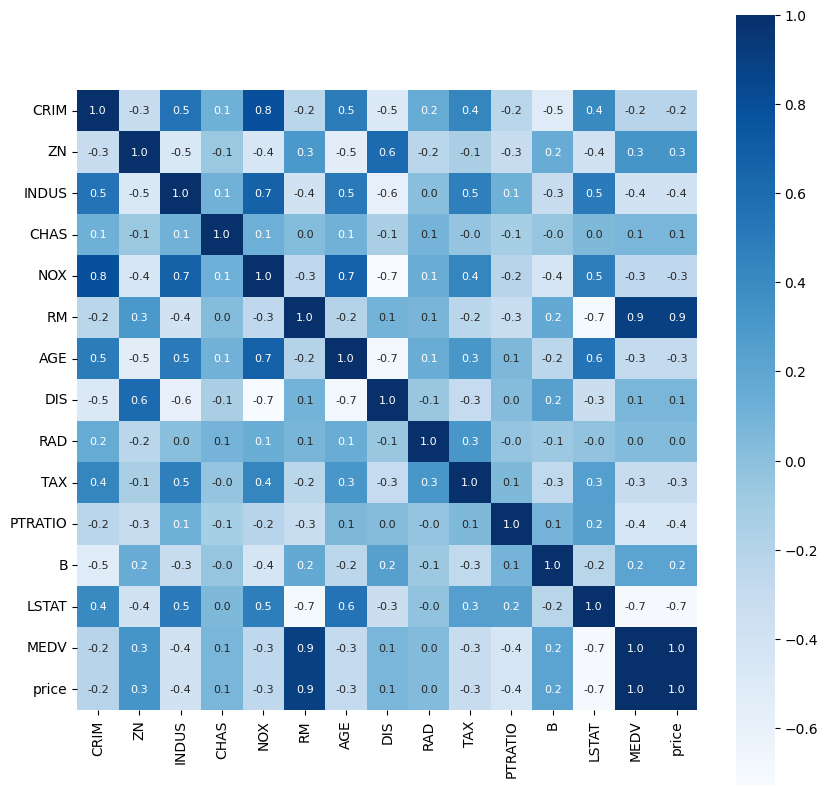

In [18]:
#Constructing a heatmap to understand the correlation
plt.figure(figsize=(10, 10))
sns.heatmap(correlation,
            cbar=True,
            square=True,
            fmt='.1f',
            annot=True,
            annot_kws={'size':8},
            cmap='Blues'
            )


In [19]:
X = house_price_dataframe.iloc[:, :-1]
Y = house_price_dataframe.iloc[:, -1]

In [20]:
print(X)
print('***************************************\n')
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
294  0.08199   0.0  13.92     0  0.437  6.009  42.3  5.5027    4  289   
295  0.12932   0.0  13.92     0  0.437  6.678  31.1  5.9604    4  289   
296  0.05372   0.0  13.92     0  0.437  6.549  51.0  5.9604    4  289   
297  0.14103   0.0  13.92     0  0.437  5.790  58.0  6.3200    4  289   
298  0.06466  70.0   2.24     0  0.400  6.345  20.1  7.8278    5  358   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [21]:
#Splitting the data into Training and Testing

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(299, 14) (239, 14) (60, 14)


In [23]:
#Model Training
model = XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [25]:
#Evaluation
#Prediciton on training data

#Accuracy for prediction on training data
training_data_pred = model.predict(X_train)
print(training_data_pred)

[22.899683  32.498764  29.59854   15.600697  12.700376  15.19859
 21.900133  24.700438  31.500189  21.999743  15.700104  46.700356
 50.000397  20.899958  24.299599  49.999527  21.200733  19.400835
 27.100142  36.400425  36.20018   18.199684  17.39707   20.299921
 22.597355  23.00034   22.800907  19.899868  14.999812  41.300808
 44.803158  17.400326  27.499708  20.998863  23.099752  19.299795
 43.500427  20.698195  22.000221  26.498636  20.899872  14.500909
 23.099566  17.80066   30.099804  18.499252  20.199558  37.201385
 21.401505  24.999687  37.29976   22.499287  24.299608  15.59965
 31.698643  18.799788  17.80041   15.30116   50.000107  35.40017
 41.698334  37.898796  39.800262  17.099768  24.801134  24.700039
 21.399387  31.101425  23.800098  48.50028   18.803263  36.50215
 19.201487  46.000637  35.19859   21.70005   23.197744  34.699738
 18.299177  24.604815  29.400696  22.000584  24.400751  30.098642
 16.19882   24.100302  20.997845  22.899788  43.100216  20.402374
 23.197054  18

In [28]:
#R squared error
score_1 = metrics.r2_score(Y_train, training_data_pred)

#Mean absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_pred)

In [30]:
print('R squared error:', score_1)
print('Mean absolute Error', score_2)

R squared error: 0.9999999849256324
Mean absolute Error 0.0008048979308315795


In [33]:
#Prediciton on Test Data

#Accuracy for prediciotn on test data
test_data_pred = model.predict(X_test)


In [35]:
#R squared error
score_1 = metrics.r2_score(Y_test, test_data_pred)

#Mean absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_pred)

print('R squared error:', score_1)
print('Mean absolute Error', score_2)

R squared error: 0.9987325773983191
Mean absolute Error 0.17135217030843117


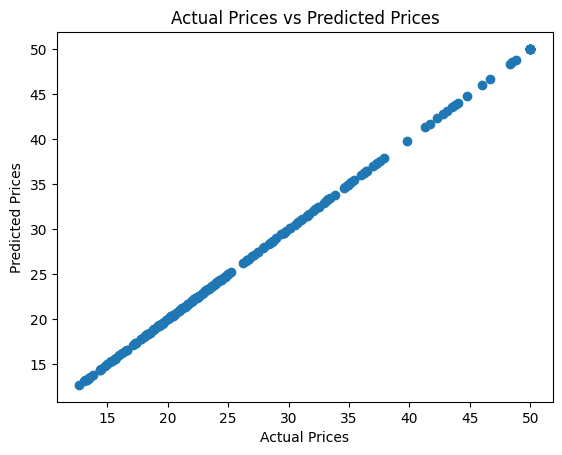

In [36]:
#Visualizing the actual Prices and predicted prices
plt.scatter(Y_train, training_data_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()